## Function Transformation

<ul>
 <li> Log Transform</li>
 <li> Reciprocal Transform</li>
 <li> Square Transform</li>
 <li> Square root transform</li>
</ul>

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv('datasets/titanic.csv', usecols=['Age', 'Fare', 'Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [3]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

/tmp/ipykernel_10878/1698716155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(df[['Age', 'Fare']], df['Survived'], test_size=0.2, random_state=42)

/media/amrit/sda2/machine_learning/CampusX/simple_project/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


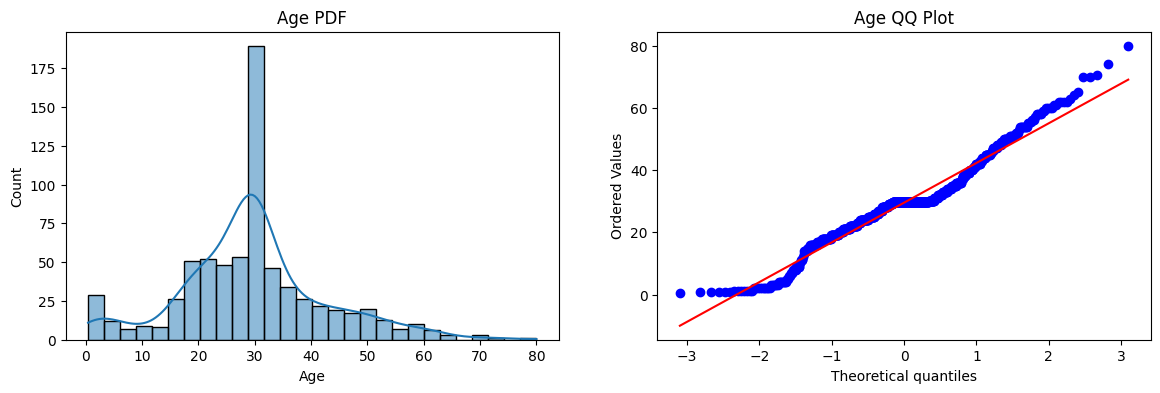

In [5]:


plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train['Age'], kde=True)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()



/media/amrit/sda2/machine_learning/CampusX/simple_project/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


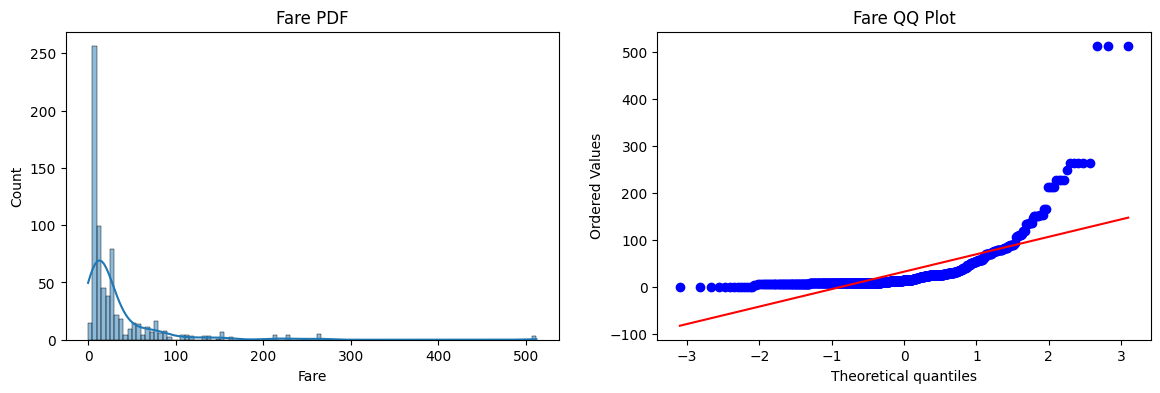

In [6]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train['Fare'], kde=True)
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [7]:
## finding accuracy without transformation
clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

clf.fit(X_train, y_train)
clf1.fit(X_train, y_train)

DecisionTreeClassifier()

In [8]:
y_pred = clf.predict(X_test)
y_pred1 = clf1.predict(X_test)

print('Accuracy LR = ', accuracy_score(y_test, y_pred))
print('Accuracy DTC = ', accuracy_score(y_test, y_pred1))

Accuracy LR =  0.6480446927374302
Accuracy DTC =  0.659217877094972
